# Wisdom of the crowd

We sometimes reply on many reviews.

ensemble learning: Core idea is we derive the solution from the majority answer from multiple models (for calssification), for numerical targets we can 
take the average.

**Types of ensemble learning:**

1. voting
2. Bagging

    ->Random forrest
3. Boosting

    ->Adaboost

    ->Gradient boosting
    
    ->XG boost
4. stacking

Stacking: stacking multiple models(multi-modeled).

Bagging: Bootstraped aggregation(randomly picking data with replacement)

Boosting: series of models , where successive model access previous model's mistakes.

Disadvantage:We need to train mutiple models and increases complexity.

Advantage: Bias and variance both is decreased. Robustness

**Always use ensemble learning**

# voting ensemble

As obvious we select base models which are independent and minimum accuracy of each model greater than 50 % .

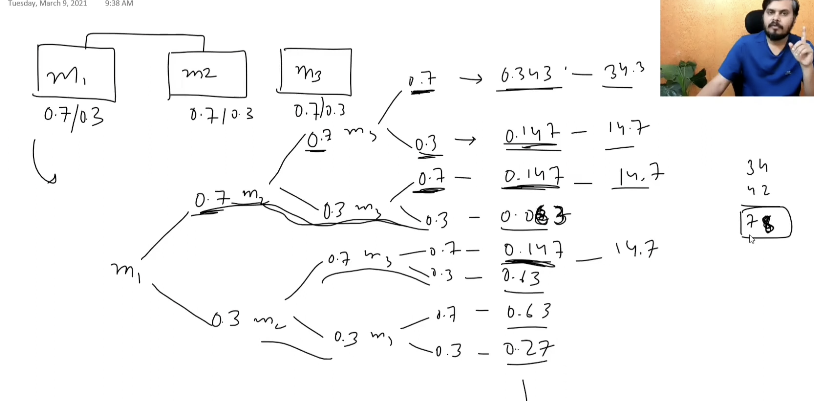

the total probabilty of choosing the major voted choice and it being correct is greater than the individual accuracies.

Hard and soft voting:

Hard we just take the majority, soft we take the average of all the class probs of each model and select the class which has highest average probabilty. 

(300, 2) (300,)


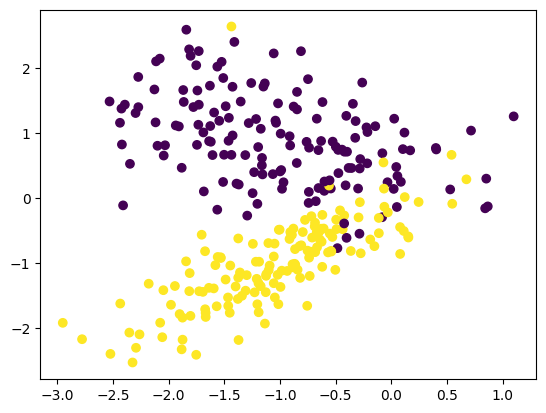

1 0.95
2 0.95
3 0.93
voting ensemble: 0.95


In [21]:
# Voting classifier
from sklearn.datasets import make_classification
x,y=make_classification(n_classes=2,n_samples=300,n_clusters_per_class=1,random_state=10,n_features=2,n_informative=2,n_redundant=0,n_repeated=0)
print(x.shape,y.shape)
import  matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y) 
plt.show()
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import numpy as np
model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=RandomForestClassifier()
model4=DecisionTreeClassifier()
estimators=[('1',model1),('2',model2),('3',model3)]
for i in estimators:
    t=cross_val_score(i[1],x,y,cv=10,scoring='accuracy')
    print(i[0],np.round(np.mean(t),2))
first=VotingClassifier(estimators=estimators,voting='hard')
x=cross_val_score(first,x,y,cv=10,scoring='accuracy')
print("voting ensemble:",np.round(np.mean(x),2))

We can also assign weights to individual models.

# Voting ensemble (numerical):

we just take the mean.

0.91
0.48
1.0


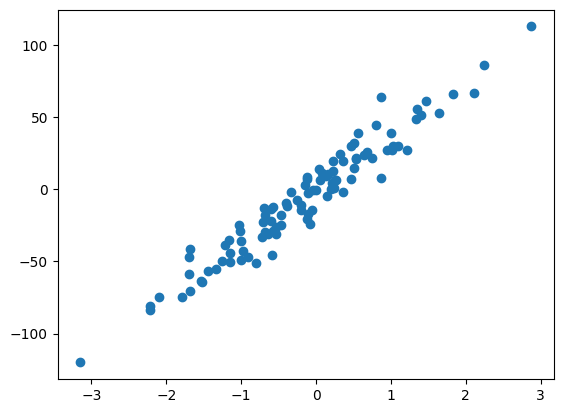

In [51]:
from sklearn.ensemble import VotingRegressor
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=10,random_state=12)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
m1=LinearRegression()
m2=SVR()
metrics=[('1',m1),('2',m2)]
plt.scatter(x,y)
for i in metrics:
    res=cross_val_score(i[1],x,y,cv=10,scoring='r2')
    print(np.round(np.mean(res),2))
k=VotingRegressor(metrics)
print(np.round(np.mean(cross_val_score(k,x,y,cv=10,scoring='r2'))))